# Aviation Dataset Analysis: Identifying Low-Risk Aircraft

### BUSINESS PROBLEM

As part of the company's efforts to diversify its portfolio, a new aviation division has been established to explore opportunities in the aircraft industry. To support the strategic decision-making process, the company requires insights into potential risks associated with various aircraft models for both commercial and private operations.

## Objectives

- Analyze safety records to determine potential risks on the aircrafts
- Identify the aircrafts with the lowest risks based on safety records and reliability.
- Provide actionable recommendations to guide aircraft purchases that aligns wit the company's goals while minimizing risk exposure.

### Dataset Overview

- **Souce**: Kaggle
- **About this file**:
  - The NTSB aviation accident database contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters

#### Aviation Dataset Column Descriptions

| Column Name             | Description |
|-------------------------|-------------|
| **Make**               | The manufacturer of the aircraft. |
| **Model**              | The specific model of the aircraft. |
| **Amateur.Built**        | Indicates if the aircraft was homebuilt by an individual rather than a  manufacturer. ("Yes" for amateur-built, "No" otherwise). |
| **Airport Name**       | The name of the airport where the incident occurred. |
| **Location**           | The city or area where the incident happened. |
| **Country**            | The country where the incident took place. |
| **Total.Fatal.Injuries** | The number of fatal injuries reported in the incident. |
| **Total.Serious.Injuries** | The number of serious injuries reported in the incident. |
| **Total.Minor.Injuries** | The number of minor injuries reported in the incident. |
| **Total.Uninjured**    | The number of people involved in the incident who were uninjured. |
| **Aircraft.Damage**    | The extent of damage to the aircraft (e.g., destroyed, substantial, minor). |
| **Aircraft.Category**  | The category of the aircraft involved (e.g., airplane, helicopter). |
| **Number.of.Engines**  | The number of engines the aircraft has. |
| **Engine.Type**        | The type of engine used (e.g., reciprocating, turbojet). |
| **FAR.Description**    | Federal Aviation Regulations category under which the aircraft was operating. |
| **Schedule**          | Whether the flight was scheduled or unscheduled. |
| **Air.Carrier**       | The airline or air carrier operating the flight. |
| **Broad.Phase.of.Flight** | The general phase of the flight when the incident occurred (e.g., takeoff, landing). |
| **Weather.Conditions** | The weather conditions at the time of the incident (e.g., VMC - Visual Meteorological Conditions, IMC - Instrument Meteorological Conditions). |



### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

In [3]:
df = pd.read_csv("AviationNewData.csv", encoding = "windows-1252", low_memory = False)


### Data Exploration

In [4]:
df.head(10) #Views first 5 rows
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df.info() #Gives Data Summary(Memory usage, columns, Datatypes, Entries)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [6]:
df.describe() #Summary statistics for numerical columns

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [7]:
df.columns = df.columns.str.strip() #To remove whitespaces

In [8]:
df['Investigation.Type'].unique() #Checking unique values before dropping the columns

array(['Accident', 'Incident'], dtype=object)

### Irelevant Columns

In [9]:
#Removes :"Event.Id", "Investigation.Type", "Accident.Number", "Airport.Code", "Registration.Number", "Publication.Date",'Latitude', 'Longitude'
#They are not relevant in this Analysis
df_relevant = df.drop(columns = ["Event.Id", "Investigation.Type", "Accident.Number", "Airport.Code", "Registration.Number", "Publication.Date",'Latitude', 'Longitude',], errors='ignore')
df_relevant.columns
df_relevant


,Event.Date,Location,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,...,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,1948-10-24,"MOOSE CREEK, ID",United States,NaN,Fatal(2),Destroyed,NaN,Stinson,108-3,No,...,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,1962-07-19,"BRIDGEPORT, CA",United States,NaN,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,...,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,1974-08-30,"Saltville, VA",United States,NaN,Fatal(3),Destroyed,NaN,Cessna,172M,No,...,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,1977-06-19,"EUREKA, CA",United States,NaN,Fatal(2),Destroyed,NaN,Rockwell,112,No,...,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,1979-08-02,"Canton, OH",United States,NaN,Fatal(1),Destroyed,NaN,Cessna,501,No,...,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,2022-12-26,"Annapolis, MD",United States,NaN,Minor,NaN,NaN,PIPER,PA-28-151,No,...,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN
88885,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,BELLANCA,7ECA,No,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
88886,2022-12-26,"Payson, AZ",United States,PAYSON,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,...,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN
88887,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,CESSNA,210N,No,...,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [10]:
df_relevant.isnull().sum() #Checks for null values for the relevant data

Event.Date                    0
Location                     52
Country                     226
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
dtype: int64

## DATA CLEANING

## Handling Missing Data

#### Event Date

In [11]:
df_relevant['Event.Date'].dtype #The date is in string format

#Detects and converts to correct date format
df_relevant['Event.Date'] = pd.to_datetime(df_relevant['Event.Date'], errors='coerce')
df_relevant['Event.Date'].head()


0   1948-10-24
1   1962-07-19
2   1974-08-30
3   1977-06-19
4   1979-08-02
Name: Event.Date, dtype: datetime64[ns]

In [12]:
df_relevant['Location'].fillna("Unknown", inplace = True) #Replaced NaN with unknown to remove the null


#### Location

In [13]:
df_relevant['Location'] = df_relevant['Location'].str.strip().str.title()  # Fix spaces & capitalization
df_relevant['Country'] = df_relevant['Country'].str.strip().str.title()

In [14]:
df_relevant.isnull().sum() #Counts the sum of missing values in all columns

Event.Date                    0
Location                      0
Country                     226
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
dtype: int64

#### Country

In [15]:
print(df_relevant['Country'].isnull().sum())  # Count missing values
 


226


In [16]:
df_relevant['Country'].fillna(df_relevant['Location'], inplace = True) #Replaces the NaN values in the Country with coresponding values in the location
df_relevant['Country'].isnull

<bound method Series.isnull of 0        United States
1        United States
2        United States
3        United States
4        United States
             ...      
88884    United States
88885    United States
88886    United States
88887    United States
88888    United States
Name: Country, Length: 88889, dtype: object>

#### Airport.Name

In [17]:
df_relevant['Airport.Name'].fillna('PRIVATE', inplace = True) #Replaces null values in Airport.Name to PRIVATE which is the mode value

In [18]:
#Replaces all unknown and repetitive values to one vale "PRIVATE AIRSTRIP"
top_5_airports = df_relevant["Airport.Name"].value_counts().head()
df_relevant["Airport.Name"] = df_relevant["Airport.Name"].replace("PRIVATE", "PRIVATE AIRSTRIP")
df_relevant["Airport.Name"] = df_relevant["Airport.Name"].replace("Private Airstrip", "PRIVATE AIRSTRIP")
df_relevant["Airport.Name"] = df_relevant["Airport.Name"].replace("NONE", "PRIVATE AIRSTRIP")
df_relevant["Airport.Name"] = df_relevant["Airport.Name"].replace("PRIVATE STRIP", "PRIVATE AIRSTRIP")
df_relevant["Airport.Name"] = df_relevant["Airport.Name"].replace("None", "PRIVATE AIRSTRIP")
df_relevant["Airport.Name"] = df_relevant["Airport.Name"].replace("UNKNOWN", "PRIVATE AIRSTRIP")
df_relevant["Airport.Name"] = df_relevant["Airport.Name"].replace("Private Strip", "PRIVATE AIRSTRIP")
df_relevant["Airport.Name"] = df_relevant["Airport.Name"].replace("Private", "PRIVATE AIRSTRIP")
top_5_airports

PRIVATE             36323
Private               240
Private Airstrip      153
NONE                  146
PRIVATE STRIP         111
Name: Airport.Name, dtype: int64

#### Injury.Severity

In [19]:
#Dropped 'Injury.Severity' becaInjury.Severityuse we have total fatal,serious,unserious,minor and uninjured columns we can work with
df_relevant.drop(columns = ['Injury.Severity'], inplace = True)


In [20]:
#Replaces the null values and the unknow with substantial which is the mode value
df_relevant['Aircraft.damage'].fillna('Substantial', inplace = True)
df_relevant['Aircraft.damage'].replace('Unknown', 'Substantial', inplace = True)
df_relevant['Aircraft.damage'].value_counts().head()


Substantial    67461
Destroyed      18623
Minor           2805
Name: Aircraft.damage, dtype: int64

#### Aircraft.Category

In [21]:
#The company is specifically interested with airplanes so we just need drop the aircraft category column
df_relevant.drop(columns = ['Aircraft.Category'], inplace = True)

#### Amateur.Built

In [22]:
#Replaced null values  with 'No' which is the mode value
df_relevant['Amateur.Built'].fillna('No', inplace = True)
df_relevant['Amateur.Built'].value_counts().head()

No     80414
Yes     8475
Name: Amateur.Built, dtype: int64

#### Make

In [23]:
df_relevant['Make'].value_counts().head()
# Replaced some of the null values with unknown ameteurs 
df_relevant.loc[df_relevant["Amateur.Built"] == "Yes", "Make"] = "Unknown Amateur-Built"
#Replaced 'CESSNA', With 'Cessna' to avoid repetion
df_relevant['Make'].replace('CESSNA', 'Cessna', inplace = True)
df_relevant['Make'].replace('PIPER', 'Piper', inplace = True)
df_relevant['Make'].replace('BOEING', 'Boeing', inplace = True)
df_relevant['Make'].replace('Douglas', 'Mcdonnell Douglas', inplace = True)
#Replaced the remaining null values to uknown 
df_relevant['Make'].fillna('Unknown', inplace = True)

df_relevant['Make'].value_counts().head(30)


Cessna                   27065
Piper                    14826
Unknown Amateur-Built     8475
Beech                     4314
Boeing                    2731
Bell                      2115
Grumman                   1090
Mooney                    1083
BEECH                     1042
Robinson                   938
Bellanca                   881
Hughes                     792
Mcdonnell Douglas          773
Schweizer                  626
Air Tractor                595
BELL                       588
Aeronca                    485
Maule                      444
Champion                   424
De Havilland               380
Aero Commander             358
Stinson                    347
Aerospatiale               340
Rockwell                   330
Taylorcraft                321
Luscombe                   317
Hiller                     308
North American             304
ROBINSON                   283
AIRBUS                     250
Name: Make, dtype: int64

#### Model

In [24]:
#Some of the models that had unknown makes are assigned to uknown makes
df_relevant.loc[df_relevant["Make"] == "Unknown", ["Unknown Amateur-Built", "Model"]] = "Unknown Make"
#The rest null values has been assigned to uknown
df_relevant['Model'].fillna('Unknown', inplace = True)
df_relevant['Model'].value_counts().head()

152          2367
172          1756
172N         1164
PA-28-140     932
150           829
Name: Model, dtype: int64

#### Make_Model

Made a new column comprising of the make and its model to make it easier to visualize and be able to decide the exact airplane the company would require

In [25]:
df_relevant['Make_Model'] = df_relevant['Make'] + "  " + df_relevant['Model']
df_relevant['Make_Model'].head(20)

0                   Stinson  108-3
1                  Piper  PA24-180
2                     Cessna  172M
3                    Rockwell  112
4                      Cessna  501
5           Mcdonnell Douglas  DC9
6                      Cessna  180
7                      Cessna  140
8                     Cessna  401B
9     North American  NAVION L-17B
10                Piper  PA-28-161
11                     Beech  V35B
12                Bellanca  17-30A
13                   Cessna  R172K
14                       Navion  A
15                       Beech  19
16                   Enstrom  280C
17                     Cessna  180
18                     Cessna  172
19       Smith  WCS-222 (BELL 47G)
Name: Make_Model, dtype: object

#### Number.of.Engines

In [26]:
df_relevant['Number.of.Engines'].value_counts()


1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

In [27]:
#Replaced the null value with 0 and converted averything into numeric datatype

df_relevant["Number.of.Engines"] = pd.to_numeric(df_relevant["Number.of.Engines"], errors="coerce")
df_relevant['Number.of.Engines'].fillna(0, inplace = True)
df_relevant["Number.of.Engines"].sum()


94943.0

#### Engine.Type

In [28]:
#It check for the rows with 0(Unknown) number of engines, then replaces the with uknown types
df_relevant.loc[df_relevant["Number.of.Engines"] == 0, "Engine.Type"] = "Unknown Engine Type"
#It replaces Uknown and none types with unkown engine types

df_relevant['Engine.Type'].replace('Unknown', 'Unknown Engine Type', inplace = True)
df_relevant['Engine.Type'].replace('None', 'Unknown Engine Type', inplace = True)
df_relevant['Engine.Type'].replace('UNK', 'Unknown Engine Type', inplace = True)
#The remaining null value are also replaced with 'Unknown Engine Type'
df_relevant['Engine.Type'].fillna('Unknown Engine Type', inplace = True)
df_relevant['Engine.Type'].value_counts()

Reciprocating          69023
Unknown Engine Type     9912
Turbo Shaft             3531
Turbo Prop              3326
Turbo Fan               2380
Turbo Jet                695
Geared Turbofan           11
Electric                   8
LR                         2
Hybrid Rocket              1
Name: Engine.Type, dtype: int64

#### FAR.Description

In [29]:
#We want the part 91 and 121 which are private and commercial use only and set the null to unknown 
far_replacements = {
    '091': 'Part 91',
    'Part 91: General Aviation': 'Part 91',
    '091K': 'Part 91',
    'Part 91F': 'Part 91',
    'Part 91 Subpart K: Fractional091': 'Part 91',
    '121': 'Part 121',
    'Non-U.S., Commercial': 'Part 121',
    'Part 121: Air Carrier': 'Part 121'
}

df_relevant['FAR.Description'].replace(far_replacements, inplace=True)

df_relevant['FAR.Description'].fillna('Unknown', inplace = True)

df_relevant['FAR.Description'].value_counts().head()

Unknown    56888
Part 91    24721
NUSN        1584
NUSC        1013
137         1010
Name: FAR.Description, dtype: int64

#### Schedule

In [30]:
#We categorize the null values as uknown and group data for better understanding
df_relevant['Schedule'].fillna('Unknown', inplace = True)
df_relevant['Schedule'].replace('UNK', 'Unknown', inplace = True)
df_relevant['Schedule'].replace({'NSCH':'Non_Scheduled','SCHD':'Scheduled'}, inplace = True)
df_relevant['Schedule'].value_counts()

Unknown          80406
Non_Scheduled     4474
Scheduled         4009
Name: Schedule, dtype: int64

#### Purpose.of.flight

In [31]:
#Replaced the null values with unknown
df_relevant['Purpose.of.flight'].fillna('Unknown', inplace =True)
df_relevant['Purpose.of.flight'].value_counts().head()

Personal              49448
Unknown               12994
Instructional         10601
Aerial Application     4712
Business               4018
Name: Purpose.of.flight, dtype: int64

#### Air.carrier

In [32]:
#Pilot part represent a pilot operating privately without a registred airline
#Replaced the null value with unknow
df_relevant['Air.carrier'].fillna('Unknown', inplace = True)
df_relevant['Air.carrier'].value_counts().head()

Unknown              72255
Pilot                  258
American Airlines       90
United Airlines         89
Delta Air Lines         53
Name: Air.carrier, dtype: int64

#### Total.Fatal.Injuries

In [33]:
#Assumed the null values means there are no fatalities
df_relevant['Total.Fatal.Injuries'].fillna(0.0, inplace = True)
df_relevant['Total.Fatal.Injuries'].value_counts().head()

0.0    71076
1.0     8883
2.0     5173
3.0     1589
4.0     1103
Name: Total.Fatal.Injuries, dtype: int64

#### Total.Serious.Injuries

In [34]:
#Assigns null values to 0.0
df_relevant['Total.Serious.Injuries'].fillna(0.0, inplace = True)
df_relevant['Total.Serious.Injuries'].value_counts().head()

0.0    75799
1.0     9125
2.0     2815
3.0      629
4.0      258
Name: Total.Serious.Injuries, dtype: int64

#### Total.Minor.Injuries

In [35]:
#Assigns null values to 0.0
df_relevant['Total.Minor.Injuries'].fillna(0.0, inplace = True)
df_relevant['Total.Minor.Injuries'].value_counts().head()

0.0    73387
1.0    10320
2.0     3576
3.0      784
4.0      372
Name: Total.Minor.Injuries, dtype: int64

In [36]:
#Assigns null values to 0.0
df_relevant['Total.Uninjured'].fillna(0.0, inplace = True)
df_relevant['Total.Uninjured'].value_counts().head()

0.0    35791
1.0    25101
2.0    15988
3.0     4313
4.0     2662
Name: Total.Uninjured, dtype: int64

#### Total.Uninjured

In [37]:
#Assigns null values to 0.0
df_relevant['Total.Uninjured'].fillna(0.0, inplace = True)
df_relevant['Total.Uninjured'].value_counts().head()

0.0    35791
1.0    25101
2.0    15988
3.0     4313
4.0     2662
Name: Total.Uninjured, dtype: int64

#### Weather.Condition

In [38]:
#Replaced UNK, Unk and null values with 'Unknown'
df_relevant['Weather.Condition'].replace('UNK', 'Unknown', inplace = True)
df_relevant['Weather.Condition'].replace('Unk', 'Unknown', inplace = True)
df_relevant['Weather.Condition'].fillna('Unknown', inplace = True)
df_relevant['Weather.Condition'].value_counts().head()

VMC        77303
IMC         5976
Unknown     5610
Name: Weather.Condition, dtype: int64

#### Broad.phase.of.flight

In [39]:
df_relevant['Broad.phase.of.flight'].fillna('Unknown', inplace = True)
df_relevant['Broad.phase.of.flight'].value_counts().head()

Unknown        27713
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Name: Broad.phase.of.flight, dtype: int64

#### Report.Status

In [40]:
df_relevant['Report.Status'].replace('<br /><br />','Unknown', inplace = True)
df_relevant['Report.Status'].fillna('Unknown', inplace = True)
df_relevant['Report.Status'].value_counts().head()

Probable Cause                                                                  61754
Unknown                                                                          6548
Foreign                                                                          1999
Factual                                                                           145
The pilot's failure to maintain directional control during the landing roll.       56
Name: Report.Status, dtype: int64

In [41]:
df_relevant.drop(columns = 'Unknown Amateur-Built', inplace = True)

In [42]:
df_relevant.isnull().sum()

Event.Date                0
Location                  0
Country                   0
Airport.Name              0
Aircraft.damage           0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           0
Schedule                  0
Purpose.of.flight         0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Make_Model                0
dtype: int64

## Handling Duplicate Rows

In [43]:
#Counts no of duplicate rows
duplicates =df_relevant[df_relevant.duplicated()]
len(duplicates)

28

In [44]:
#Drops all duplicate rows
df_relevant.drop_duplicates(inplace = True)

## Exploratory Data Analysis 

Model vs Fatal Injuries

- To find the aircraft manufacturer with the lowest fatality rate per incident, we need to normalize fatalities by the total number of flights per manufacturer instead of just using absolute fatality numbers to avoid biasness.
- I have visualized the top 20 fatality rate to see which models have the lowest fatality rate
- Rockwell  S2R has the lowest fatality rate 


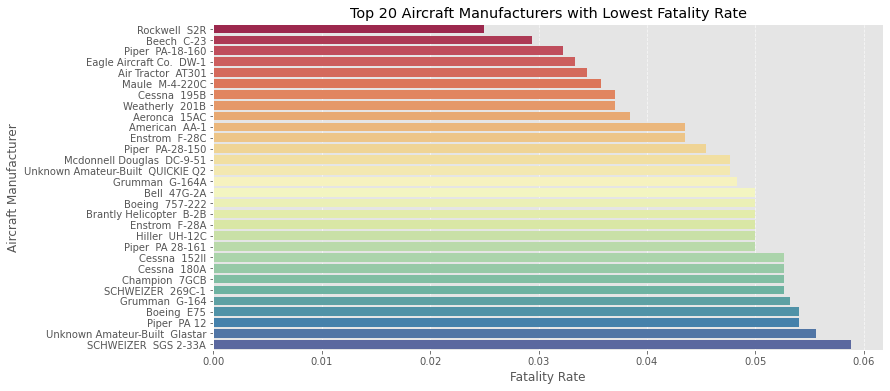

In [98]:
df_make_stats = df_relevant.groupby("Make_Model").agg(
    Total_Fatalities=("Total.Fatal.Injuries", "sum"),
    Total_Incidents=("Make_Model", "count") 
).reset_index()

df_make_stats["Fatality_Rate"] = df_make_stats["Total_Fatalities"] / df_make_stats["Total_Incidents"]

# Remove any NaN or zero values 
df_make_stats = df_make_stats.dropna()
df_make_stats = df_make_stats[df_make_stats["Fatality_Rate"] > 0]

# Manufacturer  fatality rate
best20_manufacturerers = df_make_stats.nsmallest(20, "Fatality_Rate")
best_manufacturerers = df_make_stats.nsmallest(30, "Fatality_Rate")


plt.figure(figsize=(12, 6))
sns.barplot(
    data=best_manufacturerers,
    x="Fatality_Rate",
    y="Make_Model",
    palette="Spectral"
)

plt.title("Top 20 Aircraft Manufacturers with Lowest Fatality Rate")
plt.xlabel("Fatality Rate")
plt.ylabel("Aircraft Manufacturer")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.savefig("Model vs fatalities.png")

plt.show()


In [46]:

best20_manufacturerers

,Make_Model,Total_Fatalities,Total_Incidents,Fatality_Rate
10298,Rockwell S2R,1.0,40,0.025000
2383,Beech C-23,1.0,34,0.029412
9273,Piper PA-18-160,1.0,31,0.032258
5849,Eagle Aircraft Co. DW-1,1.0,30,0.033333
1069,Air Tractor AT301,1.0,29,0.034483
8072,Maule M-4-220C,1.0,28,0.035714
4370,Cessna 195B,1.0,27,0.037037
15990,Weatherly 201B,1.0,27,0.037037
697,Aeronca 15AC,1.0,26,0.038462
1237,American AA-1,1.0,23,0.043478


### Aircraft.damage

In [47]:
 df_relevant['Aircraft.damage'].value_counts().head(50)

Substantial    67442
Destroyed      18615
Minor           2804
Name: Aircraft.damage, dtype: int64

| **Damage Type**  | **Explanation** |
|------------------|----------------|
| **Substantial**  | Most aircraft incidents fall under this category, meaning the aircraft suffered major but repairable damage. Structural integrity was affected, but the aircraft was not completely destroyed. |
| **Destroyed**    | These aircraft were damaged beyond repair, often due to severe crashes, fires, or total loss of control. |
| **Minor**        | Least severe cases where the aircraft sustained light damage but remained airworthy, requiring only minor repairs. |


We will now use the top 20 models with the lowest fatality rates and see how damaged they were during the aaccidents


In [48]:
#Filtering the main dataset to include only those manufacturers
df_fatal_damage = df_relevant[df_relevant["Make_Model"].isin(best20_manufacturerers["Make_Model"])]
df_fatal_damage

,Event.Date,Location,Country,Airport.Name,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Make_Model
154,1982-01-23,"Hobbs, Nm",United States,PRIVATE AIRSTRIP,Destroyed,Grumman,G-164A,No,1.0,Reciprocating,...,Aerial Application,Unknown,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause,Grumman G-164A
276,1982-02-08,"Nashville, Tn",United States,NASHVILLE METRO,Substantial,Beech,C-23,No,1.0,Reciprocating,...,Instructional,Unknown,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause,Beech C-23
391,1982-02-22,"Pickens, Ar",United States,M & M AG STRIP,Substantial,Grumman,G-164A,No,1.0,Reciprocating,...,Aerial Application,Unknown,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause,Grumman G-164A
631,1982-03-20,"Parsons, Ks",United States,PRIVATE AIRSTRIP,Substantial,Enstrom,F-28A,No,1.0,Reciprocating,...,Personal,Unknown,0.0,0.0,0.0,1.0,VMC,Cruise,Probable Cause,Enstrom F-28A
797,1982-04-09,"Lyle, Wa",United States,PRIVATE AIRSTRIP,Substantial,Bell,47G-2A,No,1.0,Reciprocating,...,Aerial Application,Unknown,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause,Bell 47G-2A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83235,2019-05-24,"Grangeville, Id",United States,PRIVATE AIRSTRIP,Substantial,Rockwell,S2R,No,1.0,Turbo Prop,...,Personal,Unknown,0.0,0.0,0.0,1.0,VMC,Unknown,The pilot's exceedance of the airplane's criti...,Rockwell S2R
85074,2020-07-20,"Harlan, Ia",United States,PRIVATE AIRSTRIP,Substantial,Rockwell,S2R,No,1.0,Unknown Engine Type,...,Aerial Application,Slater's Spray Service,0.0,0.0,0.0,1.0,VMC,Unknown,Unknown,Rockwell S2R
85382,2020-09-21,"Hamilton, Ga",United States,PRIVATE AIRSTRIP,Substantial,Rockwell,S2R,No,1.0,Unknown Engine Type,...,Positioning,North Valley Aircraft Inc.,0.0,0.0,0.0,1.0,VMC,Unknown,Unknown,Rockwell S2R
86378,2021-06-12,"Fulshear, Tx",United States,COVEY TRAILS,Substantial,Piper,PA-28-150,No,1.0,Reciprocating,...,Personal,Unknown,0.0,0.0,0.0,1.0,VMC,Unknown,The pilot’s failure to maintain a proper glide...,Piper PA-28-150


- We can infer from the pie chart below that a high percentage of them (78.1%) had major but repairable damage. Structural integrity was affected, but the aircraft was not completely destroyed.
- 3.1% of the make_Models had minor damages and 18.8% were completly destroyed
- Because of the inferences above, we still hold on to the Makes because they seem to be in a repairable condition even after the accident and not completely destroyed.

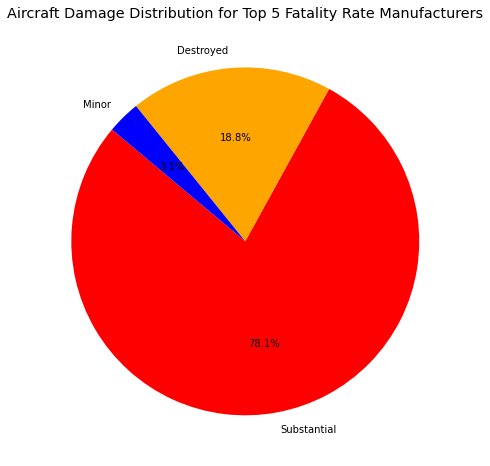

In [99]:
#Grouping by aircraft damage count occurrences
damage_counts = df_fatal_damage["Aircraft.damage"].value_counts()
#Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    damage_counts,
    labels=damage_counts.index,
    autopct="%1.1f%%",
    colors=["red", "orange", "blue"],
    startangle=140
)

plt.title("Aircraft Damage Distribution for Top 5 Fatality Rate Manufacturers")
#Save as an image
plt.savefig('Damage Distribution.png')
plt.show()

### FAR.Description

In [50]:
 df_relevant['FAR.Description'].value_counts().head()
#We need the description that hold planes for private and commercial operatios

Unknown    56865
Part 91    24717
NUSN        1584
NUSC        1012
137         1010
Name: FAR.Description, dtype: int64

#### FAR Description Table

| FAR Part  | Description |
|-----------|-------------|
| **Part 91**  | Covers general aviation, including private, business, and flight training operations. Less strict regulations compared to commercial operations. |
| **Part 121** | Covers scheduled commercial airline operations for passenger and cargo transport. Requires strict adherence to FAA regulations for safety, maintenance, and crew training. |


- FAR (Federal Aviation Regulations) Description refers to the set of rules established by the Federal Aviation Administration (FAA) that govern all aspects of civil aviation in the United States.
- Since our main focus according to the objectives of this analysis is to find airplanes that will operate for both commercial and private enterprises,
  our main focus will be on Part 91 and Part 121 for the Far Description

In [51]:
df_description = df_fatal_damage.groupby(['Make_Model', 'FAR.Description']).size().reset_index(name='Incident_Count')

df_description['Part_Type'] = df_description['FAR.Description'].apply(
    lambda x: 'Part 91' if 'Part 91' in x else ('Part 121' if 'Part 121' in x else 'Other')
)

# Display the updated DataFrame
df_description

,Make_Model,FAR.Description,Incident_Count,Part_Type
0,Aeronca 15AC,Part 91,2,Part 91
1,Aeronca 15AC,Unknown,24,Other
2,Air Tractor AT301,Unknown,29,Other
3,American AA-1,Part 91,1,Part 91
4,American AA-1,Unknown,22,Other
5,Beech C-23,Part 91,3,Part 91
6,Beech C-23,Unknown,31,Other
7,Bell 47G-2A,Part 137: Agricultural,4,Other
8,Bell 47G-2A,Part 91,2,Part 91
9,Bell 47G-2A,Unknown,14,Other


In [52]:
#Filtering to remain with part 121 and part91
df_filtered = df_description[df_description['FAR.Description'].str.contains('Part 91|Part 121', na=False)]

df_filtered = df_filtered.drop_duplicates()
df_filtered

,Make_Model,FAR.Description,Incident_Count,Part_Type
0,Aeronca 15AC,Part 91,2,Part 91
3,American AA-1,Part 91,1,Part 91
5,Beech C-23,Part 91,3,Part 91
8,Bell 47G-2A,Part 91,2,Part 91
10,Boeing 757-222,Part 121,5,Part 121
12,Brantly Helicopter B-2B,Part 91,2,Part 91
14,Cessna 195B,Part 91,9,Part 91
17,Enstrom F-28A,Part 91,4,Part 91
19,Enstrom F-28C,Part 91,3,Part 91
23,Grumman G-164A,Part 91,1,Part 91


The data is filtered in that we are having the top Make_Models that have a FAR description of Part 121 and part 91 only

In [53]:
make_model_list_filtered = df_filtered['Make_Model']
df_fatal_damage_filtered = df_fatal_damage[df_fatal_damage['Make_Model'].isin(make_model_list_filtered)]
df_fatal_damage_filtered

,Event.Date,Location,Country,Airport.Name,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Make_Model
154,1982-01-23,"Hobbs, Nm",United States,PRIVATE AIRSTRIP,Destroyed,Grumman,G-164A,No,1.0,Reciprocating,...,Aerial Application,Unknown,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause,Grumman G-164A
276,1982-02-08,"Nashville, Tn",United States,NASHVILLE METRO,Substantial,Beech,C-23,No,1.0,Reciprocating,...,Instructional,Unknown,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause,Beech C-23
391,1982-02-22,"Pickens, Ar",United States,M & M AG STRIP,Substantial,Grumman,G-164A,No,1.0,Reciprocating,...,Aerial Application,Unknown,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause,Grumman G-164A
631,1982-03-20,"Parsons, Ks",United States,PRIVATE AIRSTRIP,Substantial,Enstrom,F-28A,No,1.0,Reciprocating,...,Personal,Unknown,0.0,0.0,0.0,1.0,VMC,Cruise,Probable Cause,Enstrom F-28A
797,1982-04-09,"Lyle, Wa",United States,PRIVATE AIRSTRIP,Substantial,Bell,47G-2A,No,1.0,Reciprocating,...,Aerial Application,Unknown,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause,Bell 47G-2A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83235,2019-05-24,"Grangeville, Id",United States,PRIVATE AIRSTRIP,Substantial,Rockwell,S2R,No,1.0,Turbo Prop,...,Personal,Unknown,0.0,0.0,0.0,1.0,VMC,Unknown,The pilot's exceedance of the airplane's criti...,Rockwell S2R
85074,2020-07-20,"Harlan, Ia",United States,PRIVATE AIRSTRIP,Substantial,Rockwell,S2R,No,1.0,Unknown Engine Type,...,Aerial Application,Slater's Spray Service,0.0,0.0,0.0,1.0,VMC,Unknown,Unknown,Rockwell S2R
85382,2020-09-21,"Hamilton, Ga",United States,PRIVATE AIRSTRIP,Substantial,Rockwell,S2R,No,1.0,Unknown Engine Type,...,Positioning,North Valley Aircraft Inc.,0.0,0.0,0.0,1.0,VMC,Unknown,Unknown,Rockwell S2R
86378,2021-06-12,"Fulshear, Tx",United States,COVEY TRAILS,Substantial,Piper,PA-28-150,No,1.0,Reciprocating,...,Personal,Unknown,0.0,0.0,0.0,1.0,VMC,Unknown,The pilot’s failure to maintain a proper glide...,Piper PA-28-150


##### Risks

- Flights under Part 121
 - These flights generally have the lowest fatality rates due to strict regulations, advanced safety protocols, highly trained crews, and regular maintenance checks. The aircraft used for commercial flights also tend to be larger, more reliable, and equipped with advanced safety system
- Flights inder Part 91 
 - have a higher fatality rate, as these are often smaller, privately owned aircraft. Pilots in this category may not have the same level of training or experience as commercial airline pilots, and aircraft maintenance can be inconsistent. Additionally, general aviation flights are often conducted under more varied and potentially risky conditions (e.g., poor weather or remote areas).

### Schedule

In [54]:
df_relevant['Schedule'].value_counts().head()

Unknown          80383
Non_Scheduled     4471
Scheduled         4007
Name: Schedule, dtype: int64

#### Schedule Categories

| Code  | Description              |
|-------|--------------------------|
| NSCH  | Non-Scheduled Flight     |
| SCHD  | Scheduled Flight         |
| UNK   | Unknown Schedule Type    |


<Figure size 720x432 with 0 Axes>

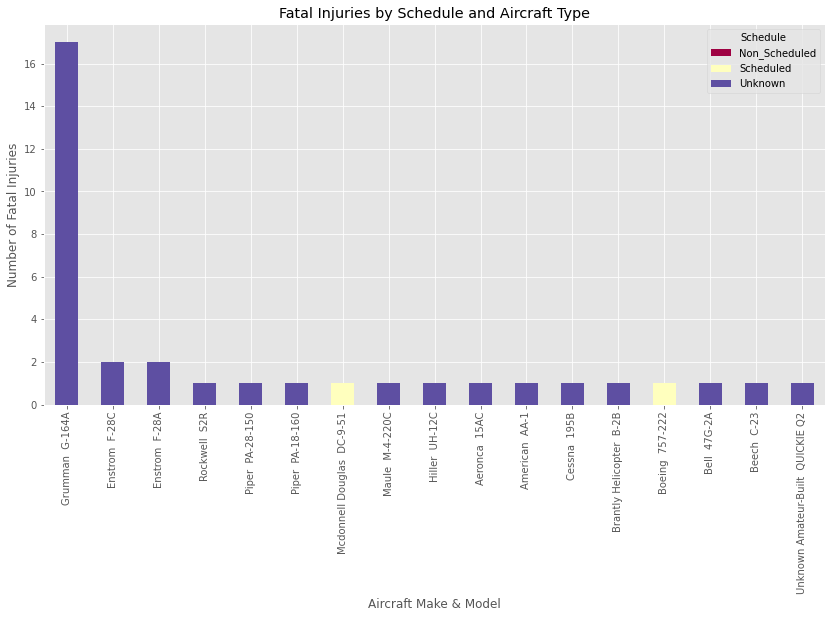

In [100]:
df_schedule = df_fatal_damage_filtered.groupby(["Schedule", "Make_Model"]).agg({
    "Total.Fatal.Injuries": "sum"
}).reset_index()

plt.figure(figsize=(10,6))

df_pivot = df_schedule.pivot(index="Make_Model", columns="Schedule", values="Total.Fatal.Injuries")
df_pivot = df_pivot.loc[df_pivot.sum(axis=1).nlargest(20).index]
df_pivot.plot(kind="bar", stacked=True, figsize=(14, 7), colormap="Spectral")

plt.title("Fatal Injuries by Schedule and Aircraft Type")
plt.xlabel("Aircraft Make & Model")
plt.ylabel("Number of Fatal Injuries")
plt.legend(title="Schedule")
plt.xticks(rotation=90)
plt.savefig('Airtcrafttype.png')
plt.show()

We can infer that from the data above, the fatality injuries happened on uknown schedules. Two of the make and model happened to have been scheduled.
- Scheduling should be taken into consideration because of the reasons below:
    -  Scheduling that includes long hours, short turnarounds, and frequent flights can significantly increase pilot fatigue. Fatigue is a well-documented risk factor in aviation accidents, as it affects a pilot's alertness, reaction times, and decision-making abilities. Pilots with insufficient rest may struggle to manage emergency situations or make timely decisions during high-stress moments 
    - The scheduling of flights at certain times of day can influence the likelihood of encountering poor weather conditions (e.g., fog, thunderstorms, snow, or high winds). Flights scheduled during the early morning or night can increase the likelihood of encountering adverse weather conditions, as these times are often associated with lower visibility, and the risk of severe weather may be higher.
    - Certain hours of the day, such as the morning and evening rush hours, experience a higher volume of air traffic. This can increase the likelihood of delays, traffic congestion, and even runway incursions or miscommunication between air traffic control (ATC) and flight crews. These busy periods may see higher accident rates due to the challenges in managing air traffic.
    - Over-scheduling can lead to pilot fatigue and stress on ground operations (e.g., maintenance, baggage handling), while under-scheduling might lead to operational inefficiencies. The right balance is crucial for optimizing safety and performance.
    

### Weather.Condition

In [56]:
df_relevant['Weather.Condition'].value_counts().head(50)

VMC        77277
IMC         5976
Unknown     5608
Name: Weather.Condition, dtype: int64

#### Weather Conditions

| Code     | Description                                      |
|----------|--------------------------------------------------|
| VMC      | Visual Meteorological Conditions (Good weather) |
| IMC      | Instrument Meteorological Conditions (Poor visibility, bad weather) |
| Unknown  | Weather conditions not specified               |


From the plot below we can infer that
- Grumman G-164A seems to be having more fatality rates even in a good weather condition and that means The model might have inherent design flaws or safety deficiencies that lead to accidents even when the weather is favorable.Therefore we will have to eliminate the model.
- Enstron F-28C, Enstron F-28A, Maule M-4-220C, Cessna 195B AND Beech C-23 seem to be having some fatality rates in poor visibility and bad weather.This indicates that these models are particularly vulnerable to certain weather factors eg  may be more prone to accidents in thunderstorms or when there is ice
- This can infer that the other Models are better equipped to handle thunderstorms or high winds because bad weather does not seem to be the reason for the presence of the fatality rate.
- The fatalities seem to be consistent in all othe models so they issue is mostly operational related and not weather related.


<Figure size 720x432 with 0 Axes>

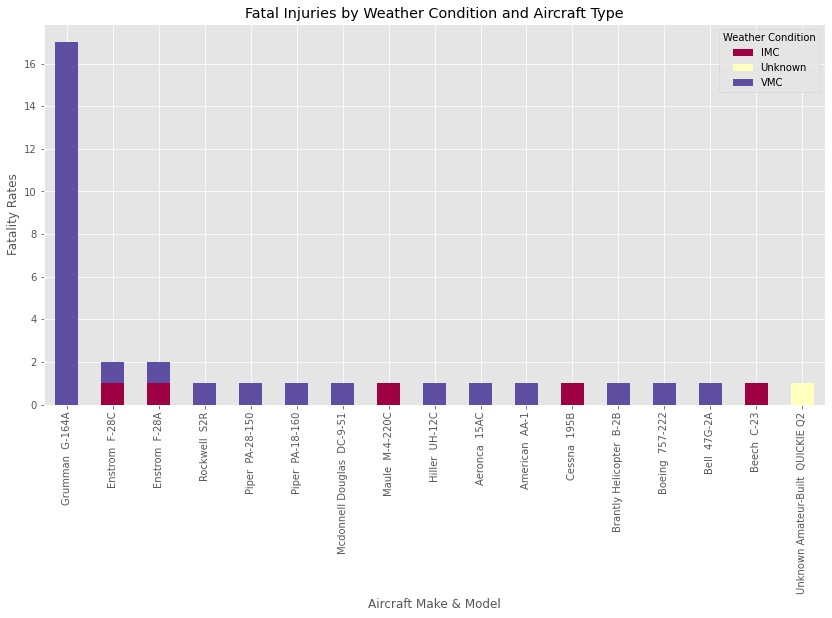

In [102]:
df_weather = df_fatal_damage_filtered.groupby(["Weather.Condition", "Make_Model"]).agg({
    "Total.Fatal.Injuries": "sum"
}).reset_index()

plt.figure(figsize=(10,6))

df_pivot = df_weather.pivot(index="Make_Model", columns="Weather.Condition", values="Total.Fatal.Injuries")
df_pivot = df_pivot.loc[df_pivot.sum(axis=1).nlargest(20).index]
df_pivot.plot(kind="bar", stacked=True, figsize=(14, 7), colormap="Spectral")

plt.title("Fatal Injuries by Weather Condition and Aircraft Type")
plt.xlabel("Aircraft Make & Model")
plt.ylabel("Fatality Rates")
plt.legend(title="Weather Condition")
plt.xticks(rotation=90)
plt.savefig('Weather conditions.png')
plt.show()

<Figure size 720x432 with 0 Axes>

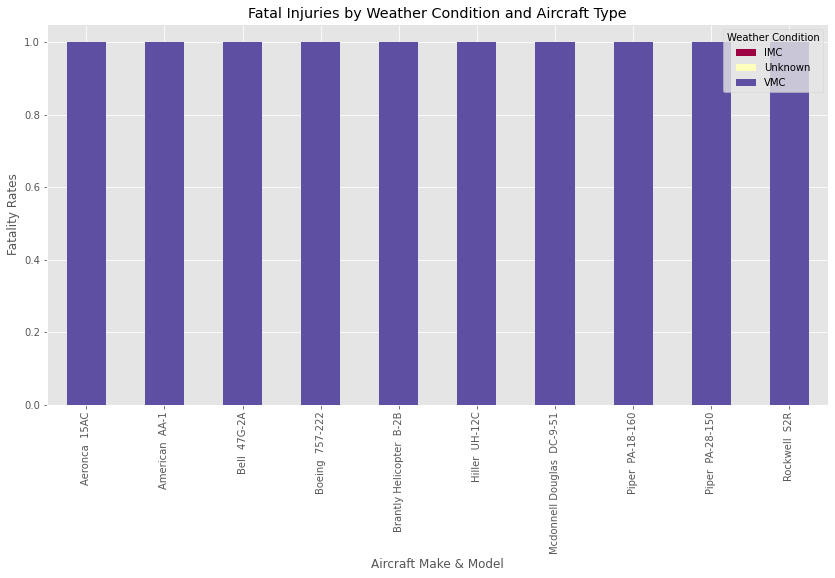

In [103]:
#Dropping the ['Grumman  G-164A','Unknown Amateur-Built  QUICKIE Q2', 'Enstrom  F-28C','Enstrom  F-28A','Maule  M-4-220C', 'Cessna  195B', 'Beech  C-23'] models
models_to_drop = ['Grumman  G-164A','Unknown Amateur-Built  QUICKIE Q2', 'Enstrom  F-28C','Enstrom  F-28A','Maule  M-4-220C', 'Cessna  195B', 'Beech  C-23']
#df_fatal_damage_filtered['Make_Model'].value_counts()
df_filtered_Weather = df_fatal_damage_filtered[~df_fatal_damage_filtered['Make_Model'].isin(models_to_drop)]

df_weather = df_filtered_Weather.groupby(["Weather.Condition", "Make_Model"]).agg({
    "Total.Fatal.Injuries": "sum"
}).reset_index()

plt.figure(figsize=(10,6))

df_pivot = df_weather.pivot(index="Make_Model", columns="Weather.Condition", values="Total.Fatal.Injuries")
df_pivot = df_pivot.loc[df_pivot.sum(axis=1).nlargest(20).index]
df_pivot.plot(kind="bar", stacked=True, figsize=(14, 7), colormap="Spectral")

plt.title("Fatal Injuries by Weather Condition and Aircraft Type")
plt.xlabel("Aircraft Make & Model")
plt.ylabel("Fatality Rates")
plt.legend(title="Weather Condition")
plt.xticks(rotation=90)
plt.savefig('Cleaned Weather.png')
plt.show()

#### Probable Causes in Aviation Accidents

| Probable Cause                  | Description |
|----------------------------------|-------------|
| **Pilot Error**                 | Mistakes made by the pilot, such as misjudgment, poor decision-making, or lack of experience. |
| **Mechanical Failure**          | Malfunctions or failures in aircraft components, including engine issues, structural defects, or system failures. |
| **Weather Conditions**          | Adverse weather conditions, such as fog, thunderstorms, or turbulence, that contribute to accidents. |
| **Air Traffic Control Error**   | Mistakes or miscommunication by air traffic controllers, leading to unsafe flight situations. |
| **Runway Conditions**           | Issues like debris, ice, or poor maintenance affecting takeoff and landing. |
| **Fuel-Related Issues**         | Fuel exhaustion, contamination, or improper fueling leading to engine failure. |
| **Bird Strike**                 | Collisions between aircraft and birds, causing damage or engine failure. |
| **Sabotage or Terrorism**       | Intentional acts that compromise the safety of the aircraft. |
| **Unknown or Undetermined**     | Cases where the cause cannot be established due to lack of evidence. |



#### Broad.phase.of.flight

- There is higher injury counts during Approach, cruise, maneuvering and Takeoff
- Fatalities are concentrated on Cruise, Landing and Takeoff and this shows high impact crashes
- These phases are critical in aviation, where most accidents occur due to pilot error, mechanical failure, or external conditions
- There is also alot of injuries and fatalities that are actually uknown 

- most injuries occur during these phases, aviation safety efforts (improved pilot training, better aircraft design, enhanced air traffic control procedures) should focus on that phase


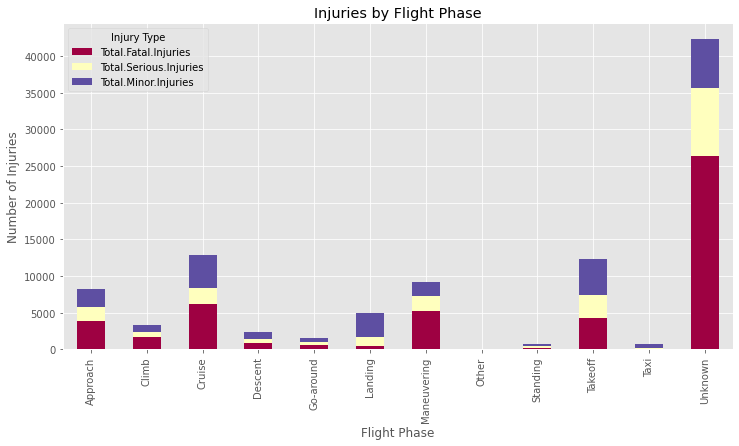

In [104]:
df_grouped = df_relevant.groupby("Broad.phase.of.flight").agg({
    "Total.Fatal.Injuries": "sum",
    "Total.Serious.Injuries": "sum",
    "Total.Minor.Injuries": "sum",
}).reset_index()

# Plot bar chart
df_grouped.plot(
    x="Broad.phase.of.flight",
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    colormap="Spectral"
)
plt.title("Injuries by Flight Phase")
plt.xlabel("Flight Phase")
plt.ylabel("Number of Injuries")
plt.legend(title="Injury Type")
plt.savefig('Broadphase.png')
plt.show()


#### Number of Engine

In [60]:
# Group by 'Make_Model' and calculate the mean for 'Number.of.Engines'
df_Engine = df_filtered_Weather.groupby('Make_Model')['Number.of.Engines'].mean().reset_index()


df_Engine



,Make_Model,Number.of.Engines
0,Aeronca 15AC,1.000000
1,American AA-1,1.000000
2,Bell 47G-2A,1.000000
3,Boeing 757-222,2.000000
4,Brantly Helicopter B-2B,0.950000
5,Hiller UH-12C,1.000000
6,Mcdonnell Douglas DC-9-51,2.000000
7,Piper PA-18-160,0.967742
8,Piper PA-28-150,1.000000
9,Rockwell S2R,0.975000


- From the analysis above,Boeing  757-222 and Mcdonnell Douglas  DC-9-51 have two engines while the rest have single engines
- Single engines may be more susceptible to complete failure if the engine malfunctions
 - Aircraft with fewer engines (especially single-engine) could have higher fatality rates due to the total reliance on one engine. If this engine fails, there are no backups, which could result in a fatal accident
- The presence of multiple engines allows for redundancy—if one engine fails, the other can continue to power the aircraft.
- In this case, we will elliminate all other Make_Models and remain with the two with 2 engines.

In [61]:
# Filter using the lambda function and filter()
models_include = ['Bell  47G-2A', 'Rockwell  S2R', 'American  AA-1',
       'Hiller  UH-12C', 'Piper  PA-28-150',
       'Brantly Helicopter  B-2B', 'Aeronca  15AC',
       'Piper  PA-18-160']
df_filtered_Engine = df_filtered_Weather[df_filtered_Weather['Make_Model'].apply(lambda x: not any(model in x for model in models_include))]

# Display the filtered DataFrame
df_filtered_Engine.head(60)




,Event.Date,Location,Country,Airport.Name,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Make_Model
3392,1982-12-01,"Boise, Id",United States,GOWEN FIELD,Substantial,Mcdonnell Douglas,DC-9-51,No,2.0,Turbo Fan,...,Unknown,"Republic Airlines, Inc.",0.0,0.0,0.0,22.0,VMC,Descent,Probable Cause,Mcdonnell Douglas DC-9-51
5180,1983-06-25,"Tampa, Fl",United States,TAMPA,Minor,Mcdonnell Douglas,DC-9-51,No,2.0,Turbo Fan,...,Unknown,Eastern Airlines,0.0,0.0,0.0,77.0,VMC,Taxi,Probable Cause,Mcdonnell Douglas DC-9-51
7278,1984-01-21,"Tampa, Fl",United States,PRIVATE AIRSTRIP,Minor,Mcdonnell Douglas,DC-9-51,No,2.0,Turbo Fan,...,Unknown,Unknown,0.0,0.0,0.0,33.0,VMC,Climb,Probable Cause,Mcdonnell Douglas DC-9-51
9528,1984-08-25,"Orlando, Fl",United States,ORLANDO,Minor,Mcdonnell Douglas,DC-9-51,No,2.0,Turbo Jet,...,Unknown,Eastern Airlines (eala),0.0,0.0,0.0,96.0,VMC,Takeoff,Probable Cause,Mcdonnell Douglas DC-9-51
13277,1985-10-19,"Tampa, Fl",United States,TAMPA INTL,Minor,Mcdonnell Douglas,DC-9-51,No,2.0,Turbo Fan,...,Unknown,Eastern Airlines,0.0,0.0,0.0,122.0,VMC,Takeoff,Probable Cause,Mcdonnell Douglas DC-9-51
15975,1986-09-25,"Raleigh-Durham, Nc",United States,RALEIGH-DURHAM,Minor,Mcdonnell Douglas,DC-9-51,No,2.0,Turbo Fan,...,Unknown,Unknown,0.0,0.0,0.0,99.0,VMC,Landing,Probable Cause,Mcdonnell Douglas DC-9-51
16430,1986-12-01,"Madison, Wi",United States,MADISON/DANE CNTY.,Minor,Mcdonnell Douglas,DC-9-51,No,2.0,Turbo Fan,...,Unknown,Unknown,0.0,0.0,0.0,114.0,IMC,Landing,Probable Cause,Mcdonnell Douglas DC-9-51
21075,1988-08-05,"Atlanta, Ga",United States,ATLANTA HARTSFIELD,Minor,Mcdonnell Douglas,DC-9-51,No,2.0,Turbo Fan,...,Unknown,"Northwest Airlines, Inc",0.0,0.0,0.0,84.0,VMC,Takeoff,Probable Cause,Mcdonnell Douglas DC-9-51
21076,1988-08-05,"Atlanta, Ga",United States,HARTSFIELD,Minor,Mcdonnell Douglas,DC-9-51,No,2.0,Turbo Fan,...,Unknown,Unknown,0.0,0.0,0.0,199.0,Unknown,Taxi,Probable Cause,Mcdonnell Douglas DC-9-51
24595,1989-12-08,"Tallahassee, Fl",United States,TALLAHASSEE,Minor,Mcdonnell Douglas,DC-9-51,No,2.0,Turbo Fan,...,Unknown,Unknown,0.0,0.0,0.0,34.0,IMC,Approach,Probable Cause,Mcdonnell Douglas DC-9-51


#### Year

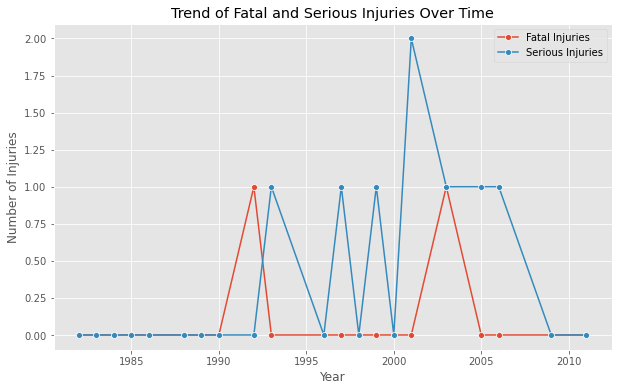

In [105]:

df_filtered_Engine["Year"] = df_filtered_Engine["Event.Date"].dt.year

df_grouped = df_filtered_Engine.groupby("Year").agg({
    "Total.Fatal.Injuries": "sum",
    "Total.Serious.Injuries": "sum"
}).reset_index()

# Plot line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x="Year", y="Total.Fatal.Injuries", label="Fatal Injuries", marker="o")
sns.lineplot(data=df_grouped, x="Year", y="Total.Serious.Injuries", label="Serious Injuries", marker="o")

plt.title("Trend of Fatal and Serious Injuries Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Injuries")
plt.legend()
plt.savefig('Year.png')
plt.show()


-Between the year 1983 to 1990,there were relatively 0 fatality rates, this might be because the models had just been introduced into the market and therefore there were less amount of flights taken using these models.
- While the two models  has been involved in some accidents over the years, the number of fatal accidents and fatalities is relatively low given the vast number of flights.This is corelated to the statistics between the year 1990 to 2010.

- From the year 2010 to the year 2020 there has been a zero fatality rate
 -This could be because of the technology that has been dedicated to develop those models hence making them reliable

- Key Insights
- Fatality Rates:

 - Boeing  757-222: This model demonstrates a low fatality rate, indicating that it has a proven safety record over time. The design and engineering of the aircraft contribute to minimizing fatal incidents.

- Mcdonnell Douglas  DC-9-51: Similarly, Mcdonnell Douglas  DC-9-51 also shows a low fatality rate, affirming that it is built with safety at the forefront. Its safety systems, whether newer or enhanced, are highly effective in reducing risk.

Number of Engines:

- Both models are equipped with engines that contribute to their safety. The number of engines plays a role in safety, especially in terms of redundancy. While one model may have more engines for added safety, both models are designed in a way that minimizes risk and ensures they operate efficiently with low fatality rates.

Maintenance and Operational Protocols:

- The low fatality rates in both models also reflect the importance of maintenance. Both models likely adhere to rigorous maintenance protocols, which ensure their continued safe operation, contributing to their overall safety performance.

- Routine checks, repairs, and adherence to safety standards are key factors that help keep these models performing safely.

Weather Conditions:

- Both models have been observed to perform well under various weather conditions, as indicated by their low fatality rates. While extreme conditions might still pose a challenge, both models show that they are capable of maintaining safety in adverse weather, which is essential for real-world aviation operations.

Conclusion:
- Both Boeing  757-222 and Mcdonnell Douglas  DC-9-51 present low fatality rates, making them strong candidates for operations where safety is the top priority. The following can be concluded:

- Boeing  757-222: This model has proven to be reliable over time and continues to operate with a low fatality rate, suggesting a well-established safety record.

- Mcdonnell Douglas  DC-9-51: Despite being newer, Mcdonnell Douglas  DC-9-51 also shows excellent performance in terms of safety with similarly low fatality rates, demonstrating that new technologies can further enhance safety without compromising performance.

Recommendations:
- For Operators: Both models should be maintained and operated in line with best practices to continue their safety performance. Regular checks and adherence to safety protocols should be a priority.

- For Future Aircraft Decisions: Either Boeing  757-222 or Mcdonnell Douglas  DC-9-51 can be considered for purchase or operation, depending on factors such as cost, maintenance history, and operational needs. Given their low fatality rates, both options are safe and viable choices.

- Ongoing Monitoring: Continuous data collection and monitoring of both models will be important to ensure that their low fatality rates are sustained over time, particularly as they age or as new technology is introduced.

Key Takeaways:
- Both Boeing  757-222 and Mcdonnell Douglas  DC-9-51 have demonstrated low fatality rates, indicating that they are both safe and reliable aircraft options.

- Boeing  757-222 benefits from its proven history of safety, while Mcdonnell Douglas  DC-9-51 offers modern technology with equally low fatality rates.

- Ensuring proper maintenance and adhering to operational protocols will continue to minimize fatalities in both models.

Final Thought:
- With both Boeing  757-222 and Mcdonnell Douglas  DC-9-51 showing low fatality rates, they both represent excellent choices for safe operations. Operators can feel confident that either model will perform well in terms of safety, offering reliability and peace of mind. Regular maintenance and adherence to safety standards will ensure that both aircraft models continue to operate at optimal safety levels.

